## Questo è un dataset di prova, funziona ma lo devo controllare con la teoria ben rifinita. C'è tutto comunque. 

# OutliersDetection



- Identify the top 1% outliers: adopt at least three different methods
from different families (e.g., density-based, angle-based…) and
compare the results.
- Visualize the outliers in a 2 or 3d scatter plot using at least one
dimensionality reduction technique.
- Deal with the outliers in a way you see fit, e.g. by removing them from
the dataset or by treating the anomalous variables as missing values
and employing replacement techniques. In this second case, you
should check that the outliers are not outliers anymore. Justify your
choices in every step

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [2]:
X_train1 = pd.read_csv("X_train.csv", header=0)
y_train = pd.read_csv("y_train.csv", header=0)
X_test1 = pd.read_csv("X_test.csv", header=0)
y_test = pd.read_csv("y_test.csv", header=0)

### osservazione: 
tenendo come riferimento adesso il notebook del prof vediamo che è normalizzato. Questo procedimento effettivamente risulterebbe importante per gli algoritmi basati sulla distanza, in quanto non vado ad isolare le singole colonne quando li vado a runnare. 
<font color = "red" >comunque è una cosa che devo controllare bene dalla teoria. Per adesso mi limito a copiare ed adattare i codici e vedere come va. 

Altra cosa importante da notare (forse). Io per adesso ho usato un DataFrame, lui usa gli array. Faccio lo stesso. Tanto li ho già pronti. 

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scl = StandardScaler()
X1 = scl.fit_transform(X_train1)
X1

array([[-1.26544058,  0.01435934,  0.01803374, ..., -1.        ,
         0.97621281, -0.97621281],
       [-1.20917578,  0.01105308,  0.01395045, ...,  1.        ,
         0.97621281, -0.97621281],
       [-1.32170538,  0.01488414,  0.01885454, ..., -1.        ,
         0.97621281, -0.97621281],
       ...,
       [-0.87165724, -0.02390865, -0.0257509 , ...,  1.        ,
        -1.02436681,  1.02436681],
       [-0.30914976, -0.01046385, -0.00991385, ..., -1.        ,
        -1.02436681,  1.02436681],
       [-0.7029331 , -0.022226  , -0.02323717, ...,  1.        ,
        -1.02436681,  1.02436681]])

In [5]:
y = y_train.values
y

array([[0],
       [0],
       [0],
       ...,
       [7],
       [7],
       [7]])

In [6]:
#Ho creato un DataFrame con gli stessi valori dell'array dello "scaler" usato dal prof. Per la visualizzazione
#utile per cambiare anche intestazione agli attributi
X_train = pd.DataFrame(X1, columns=['frame_count','sum','mean','std','min','max','q01','q05','q25','q50','q75','q95','q99','kur','skew','lag1_sum','lag1_mean','lag1_std','lag1_min','lag1_max','lag1_q01','lag1_q05','lag1_q25','lag1_q50','lag1_q75','lag1_q95','lag1_q99','lag1_kur','lag1_skew','zc_sum','zc_mean','zc_std','zc_min','zc_max','zc_q01','zc_q05','zc_q25','zc_q50','zc_q75','zc_q95','zc_q99','zc_kur','zc_skew','mfcc_sum','mfcc_mean','mfcc_std','mfcc_min','mfcc_max','mfcc_q01','mfcc_q05','mfcc_q25','mfcc_q50','mfcc_q75','mfcc_q95','mfcc_q99','mfcc_kur','mfcc_skew','sc_sum','sc_mean','sc_std','sc_min','sc_max','sc_q01','sc_q05','sc_q25','sc_q50','sc_q75','sc_q95','sc_q99','sc_kur','sc_skew','stft_sum','stft_mean','stft_std','stft_min','stft_max','stft_q01','stft_q05','stft_q25','stft_q50','stft_q75','stft_q95','stft_q99','stft_kur','stft_skew', 'vocal_channel_0','vocal_channel_1','emotional_intensity_0','emotional_intensity_1','statement_0','statement_1','repetition_0','repetition_1','sex_0','sex_1'])
X_train

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,vocal_channel_0,vocal_channel_1,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
0,-1.265441,0.014359,0.018034,-0.780862,0.715773,-0.703165,0.787286,0.815481,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
1,-1.209176,0.011053,0.013950,-0.767068,0.691859,-0.663947,0.773399,0.808599,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,-1.0,1.0,0.976213,-0.976213
2,-1.321705,0.014884,0.018855,-0.728019,0.723803,-0.610496,0.740651,0.770258,0.622665,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,1.0,-1.0,0.976213,-0.976213
3,-1.490430,0.013772,0.018087,-0.737654,0.725897,-0.588672,0.753605,0.788937,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,0.976213,-0.976213
4,-0.871692,0.013562,0.015921,-0.831819,0.785420,-0.777649,0.833221,0.864636,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.927922,-0.017837,-0.019175,-0.712651,0.742654,-0.733370,0.686745,0.695542,0.622665,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,-1.024367,1.024367
1824,-0.702898,-0.016247,-0.016770,-0.547265,0.524287,-0.535379,0.529272,0.562823,0.603864,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,-1.024367,1.024367
1825,-0.871657,-0.023909,-0.025751,-0.491381,0.614008,-0.552775,0.501560,0.401594,0.622665,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,-1.0,1.0,-1.024367,1.024367
1826,-0.309150,-0.010464,-0.009914,-0.379754,0.532491,-0.550877,0.401270,0.283622,0.603864,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,1.0,-1.0,-1.024367,1.024367


In [7]:
#Faccio la stessa cosa per il X_test, per le label (quindi y non ha cambia, sono categoriche!)
Xa = scl.fit_transform(X_test1)
Xa

array([[-1.39279901,  0.37447808,  0.47129952, ..., -1.        ,
         1.        , -1.        ],
       [-1.61568413,  0.09609662,  0.12658399, ...,  1.        ,
         1.        , -1.        ],
       [-1.44852899, -0.46733425, -0.59173514, ..., -1.        ,
         1.        , -1.        ],
       ...,
       [ 0.16722288,  0.4513389 ,  0.44534532, ...,  1.        ,
        -1.        ,  1.        ],
       [ 0.0558325 ,  0.62269836,  0.62343634, ..., -1.        ,
        -1.        ,  1.        ],
       [ 0.390108  ,  0.28043352,  0.26907375, ...,  1.        ,
        -1.        ,  1.        ]])

In [8]:
X_test = pd.DataFrame(Xa, columns=['frame_count','sum','mean','std','min','max','q01','q05','q25','q50','q75','q95','q99','kur','skew','lag1_sum','lag1_mean','lag1_std','lag1_min','lag1_max','lag1_q01','lag1_q05','lag1_q25','lag1_q50','lag1_q75','lag1_q95','lag1_q99','lag1_kur','lag1_skew','zc_sum','zc_mean','zc_std','zc_min','zc_max','zc_q01','zc_q05','zc_q25','zc_q50','zc_q75','zc_q95','zc_q99','zc_kur','zc_skew','mfcc_sum','mfcc_mean','mfcc_std','mfcc_min','mfcc_max','mfcc_q01','mfcc_q05','mfcc_q25','mfcc_q50','mfcc_q75','mfcc_q95','mfcc_q99','mfcc_kur','mfcc_skew','sc_sum','sc_mean','sc_std','sc_min','sc_max','sc_q01','sc_q05','sc_q25','sc_q50','sc_q75','sc_q95','sc_q99','sc_kur','sc_skew','stft_sum','stft_mean','stft_std','stft_min','stft_max','stft_q01','stft_q05','stft_q25','stft_q50','stft_q75','stft_q95','stft_q99','stft_kur','stft_skew', 'vocal_channel_0','vocal_channel_1','emotional_intensity_0','emotional_intensity_1','statement_0','statement_1','repetition_0','repetition_1','sex_0','sex_1'])
X_test

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,vocal_channel_0,vocal_channel_1,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
0,-1.392799,0.374478,0.471300,-0.815051,0.777164,-0.786709,0.779041,0.821105,0.677448,0.040064,...,0.856349,-0.856349,0.925820,-0.925820,1.0,-1.0,1.0,-1.0,1.0,-1.0
1,-1.615684,0.096097,0.126584,-0.823277,0.768200,-0.778866,0.797439,0.834223,0.659627,0.040064,...,0.856349,-0.856349,0.925820,-0.925820,1.0,-1.0,-1.0,1.0,1.0,-1.0
2,-1.448529,-0.467334,-0.591735,-0.829775,0.818882,-0.832860,0.799074,0.821105,0.695268,0.040064,...,0.856349,-0.856349,0.925820,-0.925820,-1.0,1.0,1.0,-1.0,1.0,-1.0
3,-1.504259,-0.060947,-0.077100,-0.794667,0.717862,-0.776905,0.766368,0.805363,0.677448,0.040064,...,0.856349,-0.856349,0.925820,-0.925820,-1.0,1.0,-1.0,1.0,1.0,-1.0
4,-0.891368,0.121215,0.141006,-0.900947,0.871633,-0.881877,0.864896,0.905935,0.695268,0.040064,...,0.856349,-0.856349,0.925820,-0.925820,1.0,-1.0,1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.612958,0.333395,0.310354,-0.329949,0.419629,-0.250537,0.375932,0.285891,-0.017564,0.040064,...,-1.167748,1.167748,0.925820,-0.925820,-1.0,1.0,-1.0,1.0,-1.0,1.0
620,0.557228,-1.075481,-1.001327,0.161684,-0.287512,0.431931,-0.156777,-0.098904,0.035899,0.040064,...,-1.167748,1.167748,-1.080123,1.080123,1.0,-1.0,1.0,-1.0,-1.0,1.0
621,0.167223,0.451339,0.445345,0.198463,0.105708,0.067093,-0.099132,-0.270313,-0.302697,0.040064,...,-1.167748,1.167748,-1.080123,1.080123,1.0,-1.0,-1.0,1.0,-1.0,1.0
622,0.055833,0.622698,0.623436,0.200039,-0.144256,0.237672,-0.058249,-0.335903,-0.267055,0.040064,...,-1.167748,1.167748,-1.080123,1.080123,-1.0,1.0,1.0,-1.0,-1.0,1.0


## NON è la parte del prof

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, random, where

In [10]:
lof = LocalOutlierFactor(n_neighbors=25)
outliers = lof.fit_predict(X_train)
lofs_index = where(outliers==-1)

In [11]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  37, 1791]))

In [12]:
outliers_score = lof.negative_outlier_factor_
outliers_score

array([-1.08569048, -1.03032584, -1.05976996, ..., -1.08782209,
       -1.09755372, -1.26708959])

In [13]:
outlier4 = np.where(outliers==-1)

In [14]:
#Creo dataset per inserire outlier di una serie di metodi
X = pd.DataFrame(outliers_score, columns=["LOF_score"])
X["LOF_label"] = outliers

In [15]:
lof.negative_outlier_factor_[np.where(outliers==-1)]

array([-3.73992617, -1.70534928, -2.30595899, -1.71771197, -1.50587244,
       -1.51429348, -1.67059305, -2.13012466, -1.82448745, -2.07892469,
       -1.77695488, -1.70543868, -1.74688647, -2.04386395, -1.51442347,
       -1.6764034 , -1.76024638, -2.07636075, -1.72410915, -1.54103275,
       -1.61104542, -1.51607996, -2.1806369 , -1.52791973, -3.14570146,
       -1.72062884, -1.76688353, -3.04108536, -1.67962502, -1.76587504,
       -4.05330527, -1.755811  , -1.93488015, -2.42253816, -1.52615988,
       -2.10349064, -2.22947078])

In [16]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.5058724414478233

In [17]:
np.min(lof.negative_outlier_factor_[np.where(outliers==-1)])

-4.053305269535475

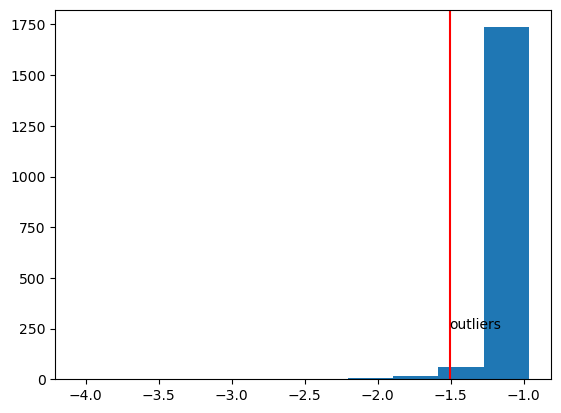

In [18]:
plt.hist(lof.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.show()

## Isolation Forest

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from numpy import quantile, random, where

In [20]:
contamination=float(.01) #specifichiamo la percentuale di outliers che si presume ci sia

In [21]:
%%time
IF = IsolationForest(n_estimators = 100, random_state=42)
IF.fit(X_train)

CPU times: user 227 ms, sys: 8.02 ms, total: 235 ms
Wall time: 248 ms


IsolationForest(random_state=42)

In [22]:
outliers = IF.predict(X_train)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 192, 1636]))

In [23]:
my_array=IF.decision_function(X_train) #score
my_array2=IF.predict(X_train) #label

In [24]:
#creo un dataset in cui vado ad inserire tutte le anomalie con lo score corrispondente
X["IF_score"] = my_array
X["IF_label"] = my_array2

In [25]:
#se vogliamo printare le anomalie o la riga corrispondente
anomaly=X.loc[X['IF_label']==-1]
anomaly_index=list(anomaly.index)

In [26]:
X_train.iloc[anomaly_index]

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,vocal_channel_0,vocal_channel_1,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
8,-0.590404,0.007183,0.008405,-0.858301,0.841103,-0.795677,0.863572,0.886265,0.585063,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
32,0.084598,0.127077,0.122441,3.365356,-3.615965,3.323699,-3.238667,-3.433494,-1.107027,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
33,0.534611,0.054005,0.049174,1.647055,-1.484658,2.006713,-1.625930,-1.440742,-2.310292,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,-1.0,1.0,0.976213,-0.976213
34,0.140828,0.132168,0.126289,1.768529,-2.511036,1.675095,-1.845183,-1.539053,-0.204579,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,1.0,-1.0,0.976213,-0.976213
35,0.647106,-0.991232,-0.878017,6.328623,-4.622095,4.262257,-6.132990,-6.300028,-2.310292,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,-1.0,1.0,0.976213,-0.976213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,-0.590404,0.040796,0.044103,3.957731,-4.365151,4.262257,-4.463549,-3.345998,0.585063,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,-1.024367,1.024367
1801,-0.477909,0.006510,0.007545,5.158714,-4.397444,4.088778,-5.630307,-5.259118,0.585063,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,-1.0,1.0,-1.024367,1.024367
1802,-0.365415,-0.003107,-0.002454,4.248338,-4.336350,4.175439,-4.511781,-4.230791,0.566262,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,1.0,-1.0,-1.024367,1.024367
1803,0.309587,-0.009575,-0.008276,4.927406,-3.288501,3.460964,-5.580074,-4.696782,0.378252,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,-1.0,1.0,-1.024367,1.024367


## ABOD

In [27]:
#!pip install pyod
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
#from pyod.models.auto_encoder import AutoEncoder

In [28]:
abod = ABOD(n_neighbors=17)
abod.fit(X_train)

ABOD(contamination=0.1, method='fast', n_neighbors=17)

In [29]:
abod_score= abod.decision_scores_

In [30]:
outliers = abod.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1655,  173]))

In [31]:
X["ABOD_score"] = abod_score
X["ABOD_label"] = outliers

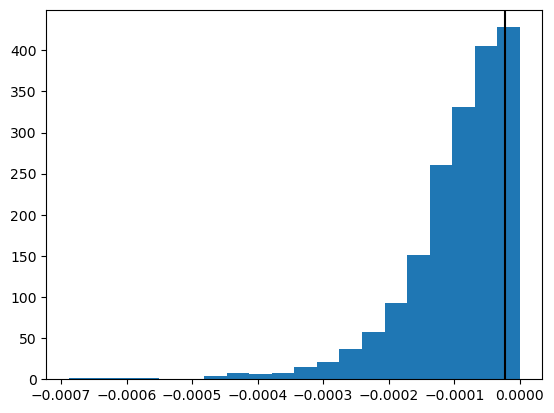

In [32]:
plt.hist(abod.decision_scores_, bins=20)
plt.axvline(np.min(abod.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

## KNN

## Find best K

Minimum error:- 0.5881410256410257 at K = 18


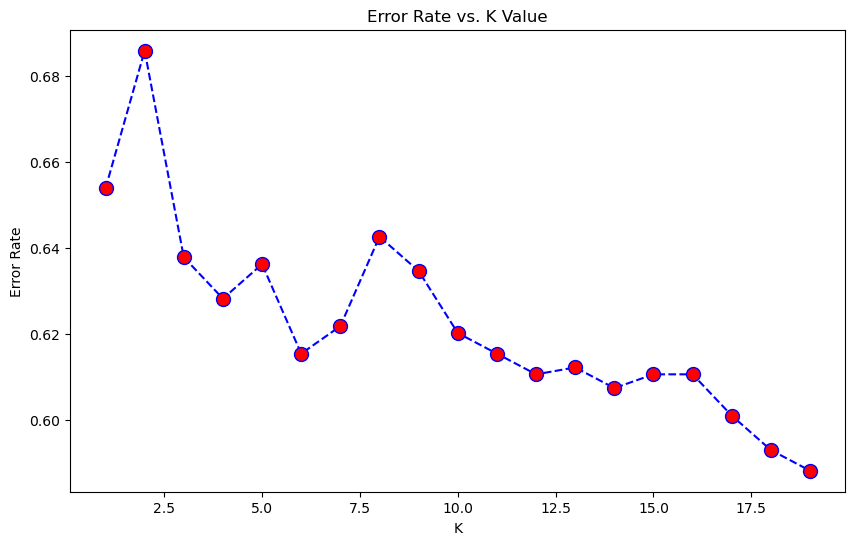

In [33]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))
#print(pred_i)
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [34]:
clf = KNN(n_neighbors=17, metric='euclidean')
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=17, p=2,
  radius=1.0)

In [35]:
outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1648,  180]))

In [36]:
anomlay_score = clf.decision_function(X_train)

In [37]:
X["KNN_score"]= anomlay_score
X["KNN_label"] = outliers

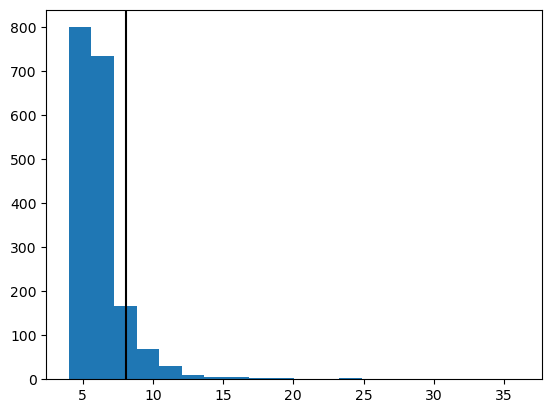

In [38]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

## Dataset completo degli outliers


In [39]:
#Impostiamo un unica label di -1 outlier e 1 inlier
classe = { 1 : -1 , 0 : 1}
X["ABOD_label"] = X["ABOD_label"].map(classe)
X["KNN_label"] = X["KNN_label"].map(classe)

In [40]:
X

,LOF_score,LOF_label,IF_score,IF_label,ABOD_score,ABOD_label,KNN_score,KNN_label
0,-1.085690,1,0.018759,1,-0.000035,1,6.317331,1
1,-1.030326,1,0.042254,1,-0.000070,1,5.647215,1
2,-1.059770,1,0.036175,1,-0.000087,1,6.155843,1
3,-1.269488,1,0.037337,1,-0.000013,-1,7.574056,1
4,-1.033589,1,0.040045,1,-0.000130,1,5.892314,1
...,...,...,...,...,...,...,...,...
1823,-1.045122,1,0.060374,1,-0.000143,1,5.873022,1
1824,-1.151020,1,0.059393,1,-0.000056,1,6.441064,1
1825,-1.087822,1,0.036562,1,-0.000071,1,7.014455,1
1826,-1.097554,1,0.067166,1,-0.000123,1,5.618122,1


## TOP 10 outliers KNN vs Rest

In [41]:
#KNN
a=X["KNN_score"].tolist()
a.sort(reverse=True)
#a

In [42]:
b=[]   #lista in cui salvo la top 1% di outlier
k=0
for i in a:
    b.append(i)
    k+=1
    if(k==10):
        break
#b  #top 10     

In [43]:
indx1=[]
for i in range(len(X)):
    for j in b:
        if(j==X.iloc[i]["KNN_score"]):
            indx1.append(i)
indx1

[42, 249, 308, 311, 1296, 1496, 1556, 1703, 1704, 1766]

In [44]:
X.iloc[indx1].sort_values(by=['KNN_score'],  ascending=False).round(6)    #+ alto è lo score + "outlier" è

,LOF_score,LOF_label,IF_score,IF_label,ABOD_score,ABOD_label,KNN_score,KNN_label
42,-3.739926,-1,-0.063989,-1,-0.000000,-1,36.129989,-1
1556,-4.053305,-1,0.019679,1,-0.000000,-1,34.295617,-1
1704,-2.422538,-1,-0.102502,-1,-0.000000,-1,25.923995,-1
1496,-3.041085,-1,-0.024974,-1,-0.000000,-1,24.716963,-1
249,-2.305959,-1,-0.097038,-1,-0.000000,-1,24.007946,-1
1296,-3.145701,-1,0.042050,1,-0.000000,-1,21.382727,-1
308,-2.130125,-1,-0.101268,-1,-0.000001,-1,19.688991,-1
311,-1.824487,-1,-0.083971,-1,-0.000001,-1,19.223569,-1
1766,-2.229471,-1,-0.033568,-1,-0.000000,-1,18.186613,-1
1703,-1.934880,-1,-0.103344,-1,-0.000003,-1,17.028936,-1


## TOP 10 outliers ABOD vs Rest

In [45]:
a=X["ABOD_score"].tolist()
a.sort(reverse=True)
#a

In [46]:
b=[]
k=0
for i in a:
    b.append(i)
    k+=1
    if(k==10):
        break
#b  #top 10     

In [47]:
indx2=[]
for i in range(len(X)):
    for j in b:
        if(j==X.iloc[i]["ABOD_score"]):
            indx2.append(i)
indx2

[42, 249, 382, 656, 1296, 1496, 1556, 1704, 1720, 1766]

In [48]:
X.iloc[indx2].sort_values(by=['ABOD_score'],  ascending=False).round(6)   #+ piccolo è lo score + "outlier" è

,LOF_score,LOF_label,IF_score,IF_label,ABOD_score,ABOD_label,KNN_score,KNN_label
42,-3.739926,-1,-0.063989,-1,-0.000000,-1,36.129989,-1
1556,-4.053305,-1,0.019679,1,-0.000000,-1,34.295617,-1
1296,-3.145701,-1,0.042050,1,-0.000000,-1,21.382727,-1
1496,-3.041085,-1,-0.024974,-1,-0.000000,-1,24.716963,-1
249,-2.305959,-1,-0.097038,-1,-0.000000,-1,24.007946,-1
1704,-2.422538,-1,-0.102502,-1,-0.000000,-1,25.923995,-1
1766,-2.229471,-1,-0.033568,-1,-0.000000,-1,18.186613,-1
656,-2.043864,-1,-0.065350,-1,-0.000000,-1,16.567584,-1
1720,-2.103491,-1,-0.022615,-1,-0.000000,-1,14.468705,-1
382,-2.078925,-1,-0.052765,-1,-0.000001,-1,14.221261,-1


## TOP 10 outliers IF_score vs Rest

In [49]:
a=X["IF_score"].tolist()
a.sort(reverse=False)
#a

In [50]:
b=[]
k=0
for i in a:
    b.append(i)
    k+=1
    if(k==10):
        break
#b  #top 10     

In [51]:
indx3=[]
for i in range(len(X)):
    for j in b:
        if(j==X.iloc[i]["IF_score"]):
            indx3.append(i)
indx3

[35, 243, 560, 561, 563, 658, 659, 1283, 1801, 1803]

In [52]:
X.iloc[indx3].sort_values(by=['IF_score'],  ascending=True).round(6)    #+ piccolo è lo score + "outlier" è

,LOF_score,LOF_label,IF_score,IF_label,ABOD_score,ABOD_label,KNN_score,KNN_label
35,-1.472014,1,-0.150372,-1,-0.000001,-1,16.272296,-1
563,-1.366443,1,-0.141941,-1,-0.000001,-1,15.738929,-1
1283,-1.184137,1,-0.128438,-1,-0.000005,-1,12.529295,-1
243,-1.087382,1,-0.122425,-1,-0.000010,-1,10.660312,-1
560,-1.247479,1,-0.121953,-1,-0.000006,-1,12.043520,-1
561,-1.209963,1,-0.114172,-1,-0.000009,-1,11.200466,-1
658,-1.109959,1,-0.114062,-1,-0.000006,-1,11.248448,-1
1801,-1.371174,1,-0.112994,-1,-0.000003,-1,13.707667,-1
1803,-1.247916,1,-0.106543,-1,-0.000008,-1,11.705350,-1
659,-1.056548,1,-0.104006,-1,-0.000010,-1,10.290536,-1


## TOP 10 outliers LOF vs Rest

In [53]:
a=X["LOF_score"].tolist()
a.sort(reverse=False)
#a

In [54]:
b=[]
k=0
for i in a:
    b.append(i)
    k+=1
    if(k==len(a)): #controlla! prima c'era "lista_lofs_index"
        break
b  #top 10   

[-4.053305269535475,
 -3.739926166658861,
 -3.145701457520407,
 -3.0410853571198384,
 -2.4225381589438078,
 -2.30595899459756,
 -2.2294707829034355,
 -2.1806369033605164,
 -2.1301246597291663,
 -2.1034906434261766,
 -2.0789246888094506,
 -2.076360746901785,
 -2.043863953750007,
 -1.9348801492395296,
 -1.8244874511498856,
 -1.7769548848167047,
 -1.7668835267383156,
 -1.7658750441957114,
 -1.7602463760664306,
 -1.7558109992853637,
 -1.7468864661880246,
 -1.7241091517832368,
 -1.7206288407360273,
 -1.7177119682432158,
 -1.705438679420729,
 -1.7053492760924445,
 -1.679625018462563,
 -1.6764034010104494,
 -1.6705930532693714,
 -1.6110454200025144,
 -1.5410327543443447,
 -1.5279197292132407,
 -1.5261598818960656,
 -1.516079956043653,
 -1.514423466007501,
 -1.5142934843194436,
 -1.5058724414478233,
 -1.4980457941869703,
 -1.489219089999423,
 -1.481058656672963,
 -1.4720143418019374,
 -1.447632563374612,
 -1.4423800134657931,
 -1.433560656984283,
 -1.4284590944346527,
 -1.4262230555639226,
 -1

In [55]:
#indx4=[]
#for i in range(len(X)):
#    for j in b:
#        if(j==X.iloc[i]["LOF_score"]):
#            indx4.append(i)


In [56]:
X.iloc[indx4].sort_values(by=['LOF_score'],  ascending=True)    #+ negativi sono gli score + "outlier" è

NameError: name 'indx4' is not defined

In [ ]:
#TOP 10 OUTLIERS IN COMUNE TRA ABOD, KNN, ISOL_FOR!!!!! oppure guardare i top 10 di un metodo con gli scores degli altri
index1 = indx1
index2 = indx2
index3 = indx3
index4 = indx4

indx1 = set(indx1)    #KNN
indx2 = set(indx2)    #ABOD
indx3 = set(indx3)    #IF _FOREST
indx4 = set(indx4)    #LOF E' quello che si comporta in maniera differente dagli altri, trovando soltanto 9 outlier rispetto ai circa 600 degli altri 3, ed inoltre e' quello che identifica il minor numero di outlier in comune con gli altri. soltano 2 elementi in comune di cui uno con un metodo ed il restante con l'altro metodo. per questo motivo abbiamo deciso di eliminare gli outlier in comune a KNN e isolation forestw

intersect =  indx1 & indx3 & indx4    #i + simili sono indx1 e indx 3 con 7 top 10 outlier in comune, (KNN-Isol_Forest)
intersect
mylist = [x for x in intersect] #converto intersect in lista
mylist

In [ ]:
X["Subject"] = subjects.iloc[mylist][0]
X["Activity"] = y_train.iloc[mylist][0]

In [ ]:
#Outliers da eliminare
X.iloc[mylist].round(6)

In [ ]:
#vediamo a quale attività corrispondono
y_train.iloc[mylist]

In [ ]:
#vediamo a quale soggetto corrispondo
subject.iloc[mylist]

## Outliers totali in comune

In [ ]:
#Salvo l'indice di tutti gli outlier
anomaly_IF=X.loc[X['IF_label']==-1]
anomaly_IF_index=list(anomaly_IF.index)
anomaly_KNN=X.loc[X['KNN_label']==-1]
anomaly_KNN_index=list(anomaly_KNN.index)
anomaly_LOF=X.loc[X['LOF_label']==-1]
anomaly_LOF_index=list(anomaly_LOF.index)
anomaly_ABOD=X.loc[X['ABOD_label']==-1]
anomaly_ABOD_index=list(anomaly_ABOD.index)

In [ ]:
#Intersezione per vedere quali outlier sono in comune tra i metodi
anomaly_IF_index = set(anomaly_IF_index)
anomaly_KNN_index = set(anomaly_KNN_index)
anomaly_LOF_index = set(anomaly_LOF_index)
anomaly_ABOD_index  = set(anomaly_ABOD_index)

intersezione = anomaly_IF_index & anomaly_KNN_index  & anomaly_ABOD_index
len(intersezione)

In [57]:
#OUTLIERS IN COMUNE TRA I DIVERSI METODI TRANNE LOF
len(intersezione)

NameError: name 'intersezione' is not defined

## Grubbs Test

In [58]:
# https://pypi.org/project/outlier_utils/

In [59]:
import numpy as np
from scipy import stats

In [60]:
data = X.values
alpha = 0.95
n = len(data)

In [61]:
significance_level = alpha / (2*n)  #alpha / n

In [62]:
1-significance_level

0.9997401531728666

In [63]:
t = stats.t.isf(significance_level, n-2, 2)

In [64]:
g_test = ((n-1) / np.sqrt(n)) * (np.sqrt(t**2 / (n-2 + t**2)))

In [65]:
relative_values = abs(data - data.mean())
index = relative_values.argmax()
value = relative_values[index]

In [66]:
index, value

(342,
 array([2.05650242, 0.07027259, 0.98796255, 0.07027259, 1.07075073,
        0.07027259, 3.34308809, 0.07027259]))

In [67]:
g = value / data.std()

In [68]:
g, g_test

(array([0.92910294, 0.03174831, 0.44634954, 0.03174831, 0.48375224,
        0.03174831, 1.51036679, 0.03174831]),
 5.432171568010729)

In [69]:
if g > g_test:
    print('outlier')
else:
    print('inlier')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [70]:
stats.t.isf(0.01, 10)

2.7637694574478893

In [71]:
stats.t.isf(0.01, 100)

2.364217365904738

In [72]:
stats.t.isf(0.01, 1000)

2.33008267475551

## PCA for top10 outliers visualization

In [73]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)

print(principal_df.shape)

(1828, 2)


In [74]:
#estraggo il subset dell'IF per poi plottarlo 
outliers_iso_for = principal_df.iloc[index3]

NameError: name 'index3' is not defined

NameError: name 'outliers_iso_for' is not defined

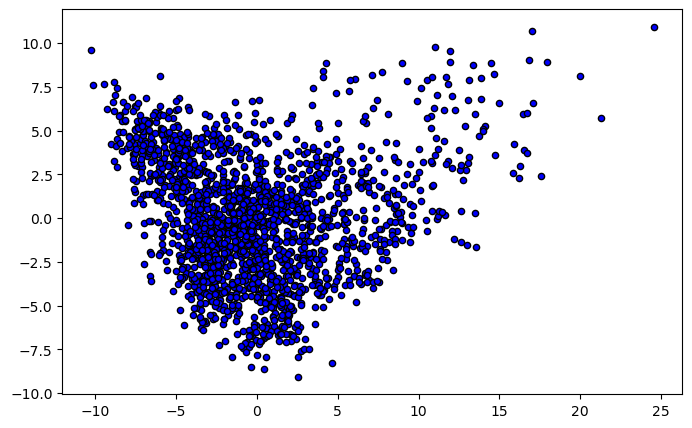

In [75]:
# plot outlier values of IF
plt.figure(figsize=(8,5))
plt.scatter(principal_df[0], principal_df[1], color = "b", s = 20, edgecolor='black')
plt.scatter(outliers_iso_for[0], outliers_iso_for[1], s=40, color = "r", edgecolor='black')
plt.title("Scatter Plot PCA con Outliers IF", fontsize=14)
plt.xlabel("Principal component 1", fontsize=13)
plt.ylabel("Principal component 2", fontsize=13)
plt.show()

In [76]:
#estraggo il subset del KNN per poi plottarlo 
outliers_KNN = principal_df.iloc[index1]

NameError: name 'index1' is not defined

NameError: name 'outliers_KNN' is not defined

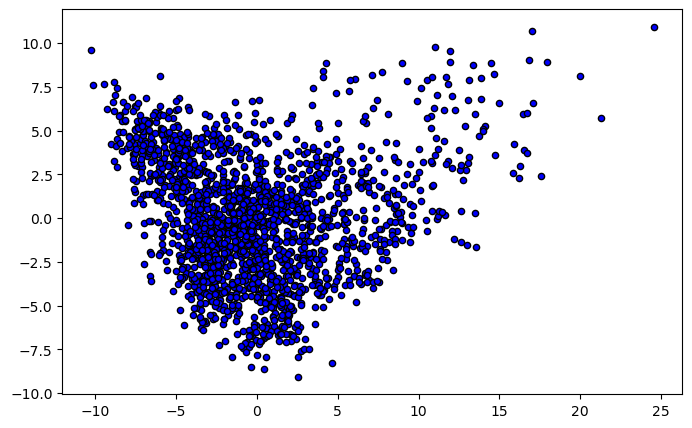

In [77]:
# plot outlier values of KNN
plt.figure(figsize=(8,5))
plt.scatter(principal_df[0], principal_df[1], color = "b", s = 20, edgecolor='black')
plt.scatter(outliers_KNN[0], outliers_KNN[1], s=40, color = "r", edgecolor='black')
plt.title("Scatter Plot PCA con Outliers KNN", fontsize=14)
plt.xlabel("Principal component 1", fontsize=13)
plt.ylabel("Principal component 2", fontsize=13)
plt.show()

In [88]:
#estraggo il subset del ABOD per poi plottarlo 
outliers_ABOD = principal_df.iloc[index2]

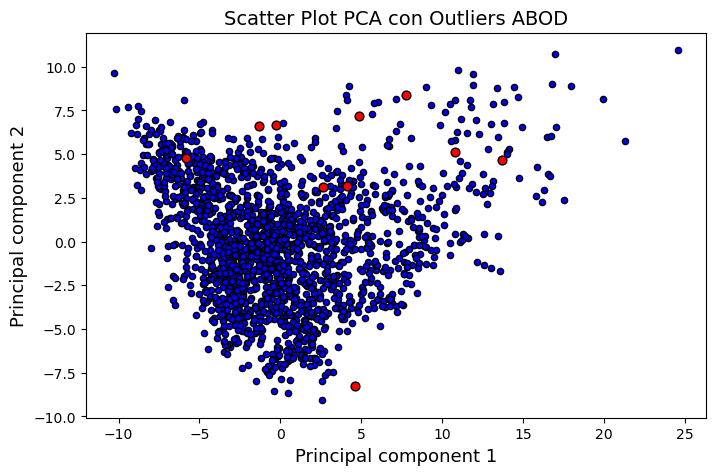

In [89]:
# plot outlier values of ABOD
plt.figure(figsize=(8,5))
plt.scatter(principal_df[0], principal_df[1], color = "b", s = 20, edgecolor='black')
plt.scatter(outliers_ABOD[0], outliers_ABOD[1],s=40, color = "r", edgecolor='black' )
plt.title("Scatter Plot PCA con Outliers ABOD", fontsize=14)
plt.xlabel("Principal component 1", fontsize=13)
plt.ylabel("Principal component 2", fontsize=13)
plt.show()

In [86]:
#parte Ludo! Vedi un po'.. 

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,vocal_channel_0,vocal_channel_1,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
0,-1.265441,0.014359,0.018034,-0.780862,0.715773,-0.703165,0.787286,0.815481,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
1,-1.209176,0.011053,0.013950,-0.767068,0.691859,-0.663947,0.773399,0.808599,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,-1.0,1.0,0.976213,-0.976213
2,-1.321705,0.014884,0.018855,-0.728019,0.723803,-0.610496,0.740651,0.770258,0.622665,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,1.0,-1.0,0.976213,-0.976213
3,-1.490430,0.013772,0.018087,-0.737654,0.725897,-0.588672,0.753605,0.788937,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,0.976213,-0.976213
4,-0.871692,0.013562,0.015921,-0.831819,0.785420,-0.777649,0.833221,0.864636,0.603864,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.927922,-0.017837,-0.019175,-0.712651,0.742654,-0.733370,0.686745,0.695542,0.622665,-0.063106,...,0.832221,-0.832221,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,-1.024367,1.024367
1824,-0.702898,-0.016247,-0.016770,-0.547265,0.524287,-0.535379,0.529272,0.562823,0.603864,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,-1.024367,1.024367
1825,-0.871657,-0.023909,-0.025751,-0.491381,0.614008,-0.552775,0.501560,0.401594,0.622665,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,1.0,-1.0,-1.0,1.0,-1.024367,1.024367
1826,-0.309150,-0.010464,-0.009914,-0.379754,0.532491,-0.550877,0.401270,0.283622,0.603864,-0.063106,...,0.832221,-0.832221,-1.079758,1.079758,-1.0,1.0,1.0,-1.0,-1.024367,1.024367
